## Forecasting LSTM with SSI at 48.5nm for 1, 2 and 3 Days NEW

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to JSWSC.

In [1]:
from library import *
from matplotlib import dates

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [2]:
np.random.seed(7)

In [3]:
# oPath = './output_files/Scaling/SSI/'

In [28]:
# interval='1'
# timeTerm='1 Day'
# interval='2'
# timeTerm='2 Days'
interval='3'
timeTerm='3 Days'

In [29]:
P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_48.5_412dias'+interval+'days.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_48.5_412dias'+interval+'days.csv'))

P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_48.5_301dias'+interval+'days.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_48.5_301dias'+interval+'days.csv'))

P3 = np.asarray(np.loadtxt('./partial_output_files/129D/P_48.5_129dias'+interval+'days.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/129D/T_48.5_129dias'+interval+'days.csv'))
Time3 = np.asarray(np.loadtxt('./partial_output_files/129D/Time_48.5_129dias'+interval+'days.csv'))

P4 = np.asarray(np.loadtxt('./partial_output_files/81D/P_48.5_81dias'+interval+'days.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/81D/T_48.5_81dias'+interval+'days.csv'))
Time4 = np.asarray(np.loadtxt('./partial_output_files/81D/Time_48.5_81dias'+interval+'days.csv'))

# outputPath = oPath+'48.5_1DayExp'

In [30]:
P1 = np.transpose(P1)
T1 = T1.reshape(-1,1)

P2 = np.transpose(P2)
T2 = T2.reshape(-1,1)

P3 = np.transpose(P3)
T3 = T3.reshape(-1,1)

P4 = np.transpose(P4)
T4 = T4.reshape(-1,1)

PT = P3
TT = T3
testSet="set3"

Standarizing the data:

In [31]:
# MinMax [0,1] for both IO:
scalerIn = MinMaxScaler(feature_range=(0, 1))
scalerOut = MinMaxScaler(feature_range=(0, 1))
scaling = "O01"

# # MinMax [0,1] for Input and MinMax [-1,1] for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = MinMaxScaler(feature_range=(-1, 1))
# scaling = "O-11"

# # MinMax [0,1] for Input and Standard for Output:
# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = StandardScaler()
# scaling = "OStd"

In [32]:
scalerIn.fit(np.concatenate((P1,P2,P4)))
scalerOut.fit(np.concatenate((T1,T2,T4)))

x1 = scalerIn.transform(P1)
x2 = scalerIn.transform(P2)
x3 = scalerIn.transform(P3)
x4 = scalerIn.transform(P4)
xt = scalerIn.transform(PT)

y1 = scalerOut.transform(T1)
y2 = scalerOut.transform(T2)
y3 = scalerOut.transform(T3)
y4 = scalerOut.transform(T4)
yt = scalerOut.transform(TT)

Defining a mask value (an outlier value) to replace the *nan* values of the output vector. (The nets can't deal with *nan* values)

In [33]:
# units = 4
epochs = 100
shuffle = True
test_size = 0.2
#loss='mse'
loss = 'mean_squared_error'
optimizer = 'adam'
afunction = "tanh"
#optimizer = 'rmsprop'
dropout = 0.2
lookback = 1
batchRate = 0.05
net = "gru"

In [34]:
# outputPath = './output_files/Activation/48.5_'

mse = []
testsqtd = 1
error =[]
lstm = []

# expName = outputPath + "lstm_"+afunction
# expName = outputPath + "gru_"+afunction
# expName = outputPath + "_gru" + scaling
# expName = outputPath + "_lstm" + scaling
expName = "teste"

unitsNumbers = range(5, 6)
#unitsNumbers = range(10, 50, 5)
#unitsNumbers = range(25,55,10)
#epochsNumbers = [50, 60, 80, 100, 150, 300]
# batchSizes = [32,64,128,256,512]
lookbacks = range(1,2)
#dropouts = [0.,0.1,0.2,0.40,0.6]
# batchRates = [0.01]

for units in unitsNumbers:
    
    p = (np.concatenate((x1,x2,x4)))
    t = (np.concatenate((y1,y2,y4)))
    
    sxTest = xt
    syTest = yt

    sxTrain, sxVal, syTrain, syVal= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

    sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[1])) 
    sxVal = sxVal.reshape((sxVal.shape[0],  lookback, sxVal.shape[1]))
    sxTest = sxTest.reshape((sxTest.shape[0],  lookback, sxTest.shape[1])) 

    batch_size = int(sxTrain.shape[0] * batchRate)
    
    for j in range(testsqtd):
        
        print('\n\nTest #'+str(j+1)) # used for units number tests
        
        model = Sequential()
#         model.add(SimpleRNN(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2])))#, return_sequences=True)) # , return_sequences=True
#         model.add(LSTM(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]),activation=afunction))#, return_sequences=True)) # , return_sequences=True
        model.add(GRU(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]),activation=afunction))#, return_sequences=True)) # , return_sequences=True
        model.add(Dense(1))
        model.compile(loss=loss, optimizer=optimizer)

        # checkpoint
        filepath = expName+'.hdf5'
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
        callbacks_list = [checkpoint]
        
        # Fit the model
        f = model.fit(sxTrain, syTrain, epochs=epochs, batch_size=batch_size, validation_data=(sxVal,syVal), callbacks=callbacks_list)

        #Load the best weights
        model.load_weights(filepath)

        #Compile model (required to make predictions)
        model.compile(loss=loss, optimizer=optimizer) #, metrics=['accuracy'])
        
        syTrainP = model.predict(sxTrain)
        syValP = model.predict(sxVal)
        syTestP = model.predict(sxTest)
        
        yTestP = scalerOut.inverse_transform(syTestP)
        yTest = scalerOut.inverse_transform(syTest)

        lstmR2 = r2_score(yTest, yTestP)
        lstmR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
        lstmMSE = mean_squared_error(yTest, yTestP)
        lstmMAPE = mean_absolute_percentage_error(yTest, yTestP)

        error.append([batch_size, np.min(f.history['val_loss'])])
        lstm.append([batch_size, lstmR2, lstmR, lstmMSE, lstmMAPE])
        print('net R2: {:2.2%} Corr: {:2.2%} MSE: {:2.2}'.format(lstmR2, lstmR, lstmMSE, lstmMAPE))
np.savetxt(expName+'.csv',lstm)



Test #1
Train on 630 samples, validate on 158 samples
Epoch 1/100
630/630 [==============================] - 1s 951us/step - loss: 0.1553 - val_loss: 0.0785
Epoch 2/100
630/630 [==============================] - 0s 80us/step - loss: 0.0568 - val_loss: 0.0613
Epoch 3/100
630/630 [==============================] - 0s 73us/step - loss: 0.0484 - val_loss: 0.0551
Epoch 4/100
630/630 [==============================] - 0s 80us/step - loss: 0.0430 - val_loss: 0.0502
Epoch 5/100
630/630 [==============================] - 0s 85us/step - loss: 0.0395 - val_loss: 0.0474
Epoch 6/100
630/630 [==============================] - 0s 89us/step - loss: 0.0368 - val_loss: 0.0447
Epoch 7/100
630/630 [==============================] - 0s 79us/step - loss: 0.0345 - val_loss: 0.0428
Epoch 8/100
630/630 [==============================] - 0s 86us/step - loss: 0.0326 - val_loss: 0.0407
Epoch 9/100
630/630 [==============================] - 0s 82us/step - loss: 0.0311 - val_loss: 0.0395
Epoch 10/100
630/630 [===

Epoch 80/100
630/630 [==============================] - 0s 76us/step - loss: 0.0189 - val_loss: 0.0265
Epoch 81/100
630/630 [==============================] - 0s 82us/step - loss: 0.0188 - val_loss: 0.0264
Epoch 82/100
630/630 [==============================] - 0s 71us/step - loss: 0.0188 - val_loss: 0.0261
Epoch 83/100
630/630 [==============================] - 0s 81us/step - loss: 0.0187 - val_loss: 0.0262
Epoch 84/100
630/630 [==============================] - 0s 78us/step - loss: 0.0187 - val_loss: 0.0262
Epoch 85/100
630/630 [==============================] - 0s 79us/step - loss: 0.0187 - val_loss: 0.0261
Epoch 86/100
630/630 [==============================] - 0s 81us/step - loss: 0.0187 - val_loss: 0.0260
Epoch 87/100
630/630 [==============================] - 0s 82us/step - loss: 0.0187 - val_loss: 0.0264
Epoch 88/100
630/630 [==============================] - 0s 83us/step - loss: 0.0186 - val_loss: 0.0261
Epoch 89/100
630/630 [==============================] - 0s 80us/step - lo

In [35]:
# make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)


#### Training and Validation Losses Histories

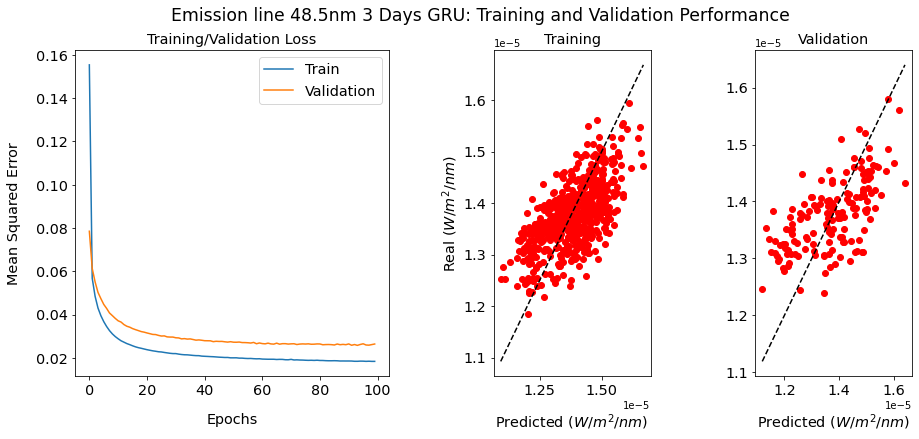

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.5)#, hspace=None)
plt.suptitle("Emission line 48.5nm "+timeTerm+" "+net.upper()+": Training and Validation Performance", fontsize='xx-large')

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss', fontsize='x-large')
ax1.set_xlabel('Epochs', labelpad=15, fontsize='x-large')
ax1.set_ylabel('Mean Squared Error', labelpad=15, fontsize='x-large')
ax1.legend(fontsize='x-large')
ax1.tick_params(axis='x', labelsize='x-large' ) 
ax1.tick_params(axis='y', labelsize='x-large' ) 

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
ax2.set_ylabel('Real ($W/m^2/nm$)', fontsize='x-large')
ax2.set_title('Training', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')
ax2.tick_params(axis='x', labelsize='x-large' ) 
ax2.tick_params(axis='y', labelsize='x-large' ) 

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=15, fontsize='x-large')
# ax3.set_ylabel('Real ($W/m^2/nm$)', fontsize='xx-large')
# ax3.set_yticks([])
ax3.set_title('Validation', fontsize='x-large')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')
ax3.tick_params(axis='x', labelsize='x-large') 
ax3.tick_params(axis='y', labelsize='x-large' ) 

#fig.savefig('./Figures/LSTM Training x Validation 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/SSI Predictions/48.5_'+net.upper()+'_Training x Validation_'+timeTerm+'.pdf', dpi=200, format='pdf')

### Predicting Test Set 3

In [37]:
TimeT = Time3
# testSet = 'Set3'

rnnR2 = r2_score(yTest, yTestP)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
rnnMSE = mean_squared_error(yTest, yTestP)
rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstr = '\n'.join(('R = '+r,
                    r'$R^2$ = '+r2,
                     'MSE = '+mse,
                     'MAPE = '+mape))

In [38]:
data = []
for i in TimeT:
    data.append(str(date.fromordinal(int(i))))

datesT = dates.date2num(data)

hfmt = dates.DateFormatter('%m/%d')

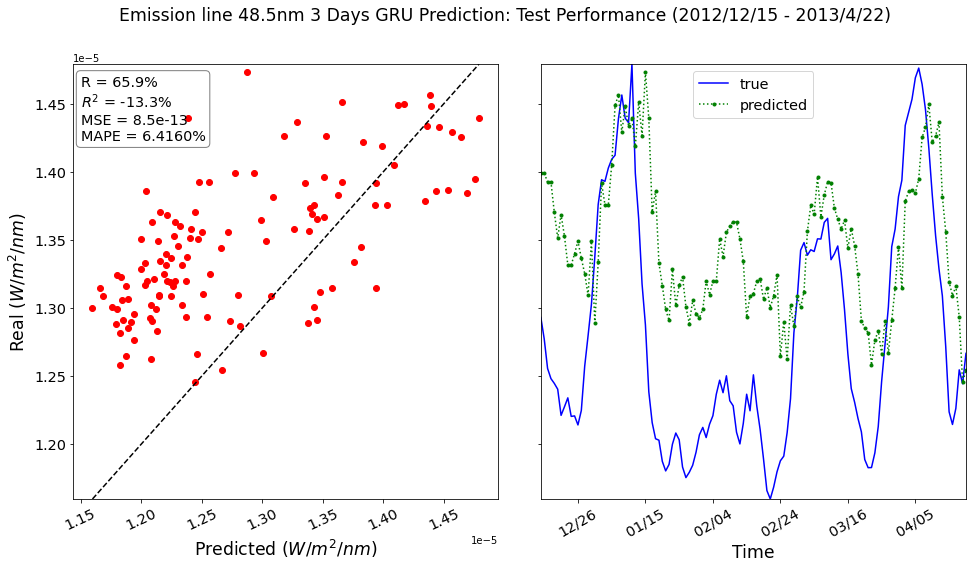

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])
ma = np.max([yTestP.max(),yTest.max()])

yAxis = [mi,ma]

plt.suptitle("Emission line 48.5nm "+timeTerm+" "+net.upper()+" Prediction: Test Performance (2012/12/15 - 2013/4/22)", fontsize='xx-large')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
ax1.set_ylabel('Real ($W/m^2/nm$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25, labelsize='x-large')
ax1.tick_params(axis='y', labelsize='x-large')

props = dict(boxstyle='round', facecolor='None', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.0175, 0.975, textstr, transform=ax1.transAxes, fontsize='x-large',
        verticalalignment='top', bbox=props)


ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlim([datesT[0],datesT[-1]])
ax2.set_xlabel('Time', labelpad=5, fontsize='xx-large')
ax2.tick_params(axis='x', rotation=30, labelsize='x-large')
ax2.legend(fontsize='x-large')

fig.savefig('./Figures/SSI Predictions/48.5'+net.upper()+'_Test'+testSet+'_'+timeTerm+'.pdf', dpi=200, format='pdf', pad_inches=0.1)

Ploting and comparing the 50 first true and predicted values:

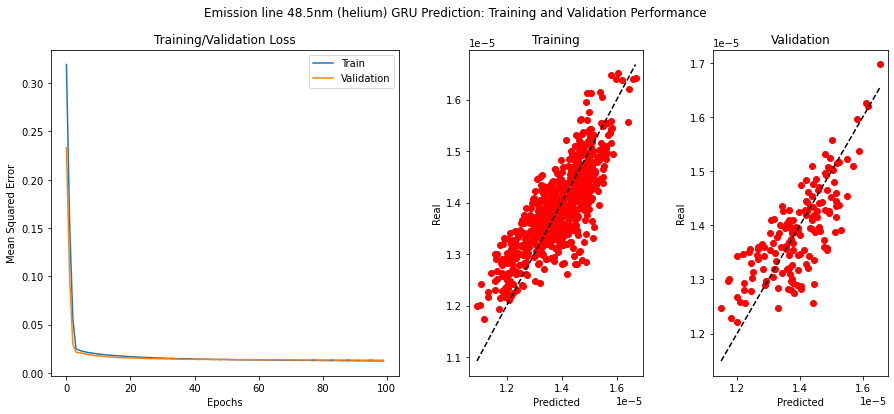

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.3)#, hspace=None)
plt.suptitle("Emission line 48.5nm (helium) GRU Prediction: Training and Validation Performance")

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Mean Squared Error')
ax1.legend()

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Real')
ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Real')
ax3.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')

fig.savefig('./Figures/GRU Training x Validation 48.5 1 Day.png', dpi=600, format='png')

In [27]:
# make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)


In [40]:
#np.savetxt('LSTMTests\\'+timeTerm+'\\LookBackTests\\'+param+str(testsqt)+'.csv',mse) # used for lookback tests

In [39]:
#model.save("reluModel.h5")

In [38]:
print(syTrainP.min())
print(syTrainP.max())
print(syValP.min())
print(syValP.max())
print(syTestP.min())
print(syTestP.max())
print(syTest.min())
print(syTest.max())

0.1136467
0.94450927
0.15527137
0.8664157
0.22135095
0.6979539
0.11647132172334151
0.670952921610593


#### Training and Validation Losses Histories